# Определение стоимости недвижимости из набора данных California Housing

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

<a target="_blank" href="https://colab.research.google.com/github/sozykin/dlpython_course/blob/master/introduction/california_housing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [25]:
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [9]:
# В Keras встроены средства работы с популярными наборами данных
(train_data, train_targets), (test_data, test_targets) =  california_housing.load_data(version="large")

Размерность данных

In [10]:
train_data.shape

(16512, 8)

In [11]:
test_data.shape

(4128, 8)

Просматриваем данные

In [12]:
train_targets[:5]

array([252300., 146900., 290900., 141300., 500001.], dtype=float32)

**Названия столбцов**

- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

Целевая переменная - средняя стоимость недвижимости в квартале

In [13]:
train_targets[:5]

array([252300., 146900., 290900., 141300., 500001.], dtype=float32)

**Предварительная обработка данных**

Нормализация данных для обучения

In [14]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
x_train = (train_data - mean) / std
x_test = (test_data - mean) / std

Масштабирование целевой переменной

In [15]:
y_train = train_targets / 100000
y_test = test_targets / 100000

## Создаем модель

In [ ]:
model = Sequential(
        [
            Dense(64, activation="relu"), # Входной слой
            Dense(32, activation="relu"), # Скрытый слой
            Dense(1),                     # Выходной слой, нет функции активации  
        ]
    )

Компилируем модель

In [81]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mean_absolute_error"],
)

## Обучаем модель

In [ ]:
history = model.fit(x_train,         # Данные для обучения
                    y_train,         # Правильные ответы
                    batch_size=32,   # Размер мини-выборки
                    epochs=130,      # Количество эпох обучения
                    validation_split=0.2, # Доля для проверочного набора данных
                    verbose=2)  

Epoch 1/130
826/826 - 1s - 2ms/step - loss: 0.6880 - mean_absolute_error: 0.5712 - val_loss: 0.3922 - val_mean_absolute_error: 0.4408
Epoch 2/130
826/826 - 1s - 996us/step - loss: 0.3737 - mean_absolute_error: 0.4366 - val_loss: 0.3697 - val_mean_absolute_error: 0.4382
Epoch 3/130
826/826 - 1s - 952us/step - loss: 0.3529 - mean_absolute_error: 0.4218 - val_loss: 0.3615 - val_mean_absolute_error: 0.4349
Epoch 4/130
826/826 - 1s - 951us/step - loss: 0.3434 - mean_absolute_error: 0.4134 - val_loss: 0.3436 - val_mean_absolute_error: 0.4159
Epoch 5/130
826/826 - 1s - 986us/step - loss: 0.3314 - mean_absolute_error: 0.4062 - val_loss: 0.3344 - val_mean_absolute_error: 0.4063
Epoch 6/130
826/826 - 1s - 936us/step - loss: 0.3234 - mean_absolute_error: 0.4000 - val_loss: 0.3321 - val_mean_absolute_error: 0.3963
Epoch 7/130
826/826 - 1s - 943us/step - loss: 0.3185 - mean_absolute_error: 0.3963 - val_loss: 0.3296 - val_mean_absolute_error: 0.3933
Epoch 8/130
826/826 - 1s - 991us/step - loss: 0.31

### Визуализация прогресса обучения

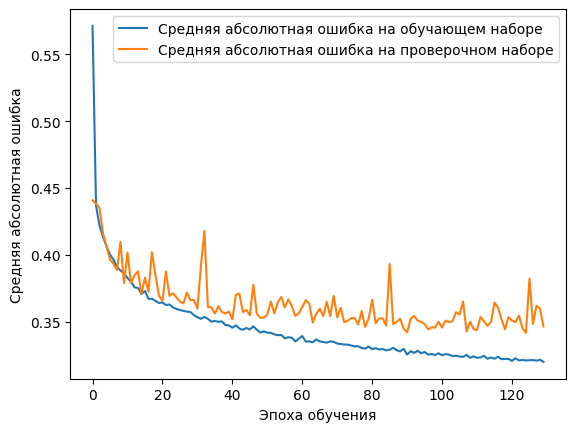

In [83]:
plt.plot(history.history['mean_absolute_error'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mean_absolute_error'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

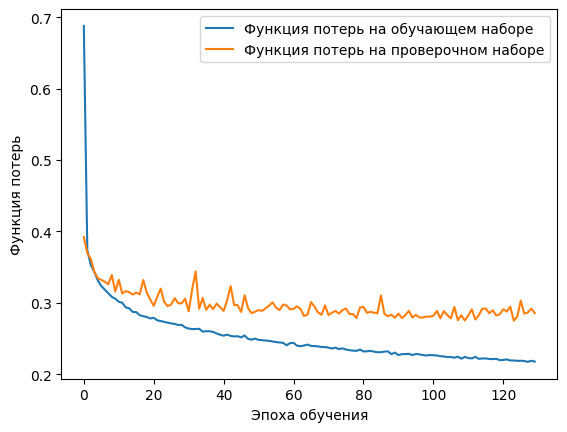

In [84]:
plt.plot(history.history['loss'], 
         label='Функция потерь на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Функция потерь на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Функция потерь')
plt.legend()
plt.show()

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [85]:
scores = model.evaluate(x_test, y_test, verbose=1)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.2832 - mean_absolute_error: 0.3529


In [86]:
print("Средняя абсолютная ошибка:", scores[1] * 100000)

Средняя абсолютная ошибка: 35287.50538825989


## Предсказание на тестовых данных

In [87]:
predictions = model.predict(x_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step


In [90]:
predictions[:5]

array([[1.9147214 ],
       [2.4129071 ],
       [1.9162626 ],
       [0.14930081],
       [1.7035018 ]], dtype=float32)

In [91]:
y_test[:5]

array([3.979, 2.279, 1.721, 1.865, 1.489], dtype=float32)